Forecasting!! -360DIGITMG

Forecasting is the process of making predictions of the future based on past and present data and analysis of trends.Trending or predicting a continuation based on the shape of the line generated by plotting past results.

Forecasting problem 1. The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

Business objective: Forecast the future air passengers per month next 60 months

In [5]:
import pandas as pd       # for Data Manipulation
import numpy as np        # for Mathematical calculations

In [3]:
airline = pd.read_excel("D:/Datascience/Assignment/27.Forecasting - Time Series/Airlines Data.xlsx")

In [4]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [6]:
airline['mnth_yr'] = airline['Month'].apply(lambda x: x.strftime('%B-%Y'))  #creating new column "mnth_yr" which contain month and year
airline=airline.drop("Month", axis=1)  # column "Month" is droped from  dataframe  
airline = airline.rename({'mnth_yr': 'Month'}, axis=1) # Renamed column "mnth_yr" to "Month"
airline= airline[['Month','Passengers']] 

In [7]:
airline['months']= 0                   #new column "month" is created with all the elements equal to zero

for i in range(96):                    #Filling elements in column "month" with first three letters of column "Month"
    p = airline["Month"][i]
    airline['months'][i]= p[0:3]

<ipython-input-7-e08e496d3d3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['months'][i]= p[0:3]
C:\Users\Naveen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
month_dummies = pd.DataFrame(pd.get_dummies(airline['months'])) # creating dummies for "month" column
airline1 = pd.concat([airline,month_dummies],axis = 1)          # concating airlines dataframe and month_dummies, creating newdataframe airline1  

In [11]:
airline1["t"] = np.arange(1,97)                               # creating new column t 
airline1["t_squared"] = airline1["t"]*airline1["t"]           # crearing new column "t_squared" by squaring elements of "t" column 
airline1["log_pas"] = np.log(airline1["Passengers"])          # creating new column "log_pas" by taking log on "passenger" column elements
airline1.columns                                              # checking for column names

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_pas'],
      dtype='object')

<AxesSubplot:>

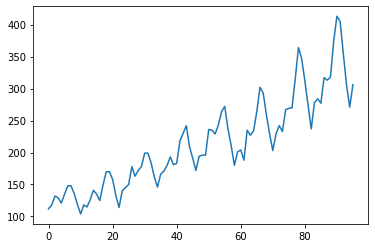

In [13]:
airline1.Passengers.plot()

In [14]:
airline1

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_pas
0,January-1995,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,February-1995,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,March-1995,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,April-1995,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-1995,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,August-2002,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,September-2002,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,October-2002,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,November-2002,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [15]:
#spliting the data into train and test by consider last 12 months as test data
Train = airline1.head(84)
Test = airline1.tail(12)

In [17]:
import statsmodels.formula.api as smf 

In [18]:
# linear
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [19]:
# Exponential
Exp = smf.ols('log_pas~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t']))) 
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2)) 
rmse_Exp

46.0573611031562

In [20]:
# Quadratic
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933095

In [21]:
# Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421822

In [22]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086453

In [23]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_pas~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708643

In [24]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323899

In [25]:
# Comparing all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,53.199237
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_add_sea_quad,26.360818
5,rmse_Mult_sea,140.063202
6,rmse_Mult_add_sea,10.519173


In [44]:
predict_data = pd.read_csv("D:/Datascience/Assignment/27.Forecasting - Time Series/Predict_air.csv")

In [45]:
model_full = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airline1).fit()

In [51]:
pred_full=model_full.predict(airline1)
airline1["pred_full"]=pred_full
residuals=pd.DataFrame(np.array(airline1["Passengers"]-np.array(pred_full)))
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new = np.exp(pred_new)
pred_new

0     320.779889
1     324.173779
2     374.075905
3     361.986306
4     359.632793
5     407.045777
6     452.677464
7     451.720349
8     404.569872
9     355.211286
10    311.768944
11    357.383375
12    367.043091
13    370.926451
14    428.025513
15    414.192340
16    411.499400
17    465.750333
18    517.963068
19    516.867917
20    462.917350
21    406.440219
22    356.732578
23    408.925568
24    419.978419
25    424.421841
26    489.755787
27    473.927580
28    470.846262
29    532.921320
30    592.664229
31    591.411134
32    529.679761
33    465.057441
34    408.180913
35    467.901230
36    480.548133
37    485.632390
38    560.388865
39    542.277898
40    538.752189
41    609.779775
42    678.138867
43    676.705049
44    606.070715
45    532.128498
46    467.049180
47    535.382421
48    549.853274
49    555.670788
50    641.208717
51    620.485768
52    616.451577
53    697.722834
54    775.940744
55    774.300140
56    693.478850
57    608.872611
58    534.4074

In [52]:
predict_data["forecasted_passengers"] = pred_new

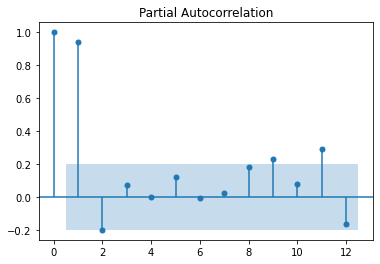

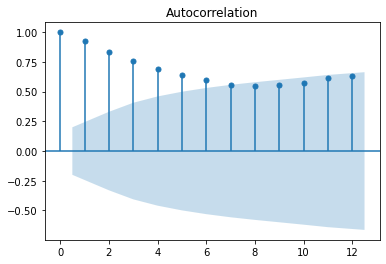

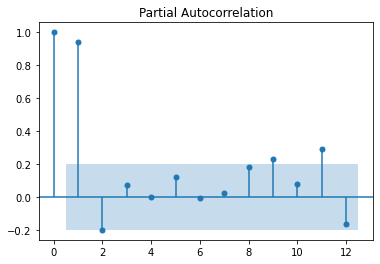

In [53]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12)
sm.graphics.tsa.plot_pacf(airline1.Passengers.values.squeeze(), lags=12)

In [54]:
from statsmodels.tsa.arima_model import ARIMA
pas=airline["Passengers"]
model=ARIMA(residuals,order=(1,0,0)).fit(transparams=True) #ARIMA model building
forecasterrors=model.forecast(steps=12)[0]
predict_data["forecasted_passengers"] = pd.Series(pred_new)
predict_data["forecasted_errors"] = pd.Series(forecasterrors)
predict_data["improved"] = predict_data["forecasted_passengers"]+predict_data["forecasted_errors"]

C:\Users\Naveen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

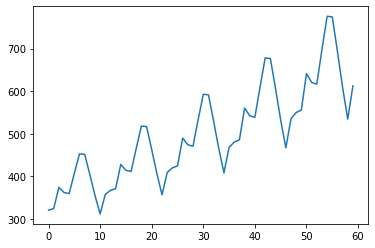

In [55]:
predict_data["forecasted_passengers"].plot()      #plotting the forecasted air passengers per month